<a href="https://colab.research.google.com/github/d4yane/numerical-methods/blob/main/%5BProjeto_I%5D_%5BM%C3%A9todos_Num%C3%A9ricos%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

## 🎓 (UFPB) - Universidade Federal da Paraíba
### **Métodos Numéricos - Atividade Prática - [Projeto I]**

👩‍🏫 Professora: Ana Paula Pintado Wyse

👩🏻‍🎓 Discente: Dayane Freitas Felipe Ramos


```
📖 Importando as Bibliotecas
```

In [ ]:
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt

In [ ]:
def get_input(prompt, data_type):
    while True:
        try:
            return data_type(input(prompt))
        except ValueError:
            print("Entrada inválida. Tente novamente.")



```
⇛ Método da Bisseção
```



 É uma técnica de busca de raízes que **trabalha diminuindo o intervalo que contém uma raiz para localizá-la de forma precisa.** Começa com um intervalo $[a, b]$ que contém uma raiz (ou seja, os valores de $f(a)$ e $f(b)$ têm sinais opostos). Em seguida, é selecionado o ponto médio $c$ do intervalo e o intervalo é atualizado para $[a, c]$ ou $[c, b]$ dependendo de onde a raiz está localizada (o subintervalo onde $f$ muda de sinal). Este processo é repetido até que a raiz seja isolada com a precisão desejada.


In [ ]:
def bissecao(f, a, b, error, max_iterations):
    x_vals = []
    iterations = 0

    while iterations < max_iterations:
        x = (a + b) / 2
        x_vals.append(x)

        if f(a) * f(x) > 0:
            a = x
        else:
            b = x

        if iterations > 0 and abs(x_vals[-1] - x_vals[-2]) < error:
            x_vals.append(x)  # garantir que o último valor seja adicionado
            break

        iterations += 1

    return x_vals, iterations



```
⇛ Método de Newton
```



É um algoritmo iterativo para encontrar aproximações sucessivas das raízes (ou zeros) de uma função real. A ideia básica é assumir que a função pode ser aproximada por uma reta tangente no ponto atual e calcular a interseção dessa reta tangente com o eixo x para obter a próxima aproximação. Matematicamente, a iteração é expressa como:
<center>
$ x_{\text{new}} = x_{\text{old}} - \frac{f(x_{\text{old}})}{f'(x_{\text{old}})} $
<center>

onde $ f' $ é a derivada da função $ f $.


In [ ]:
def newton_raphson(f, f_prime, x0, error, max_iterations):
    x_vals = [x0]
    iterations = 0

    while iterations < max_iterations:
        x = x_vals[-1] - f(x_vals[-1]) / f_prime(x_vals[-1])
        x_vals.append(x)

        if abs(x_vals[-1] - x_vals[-2]) < error:
            break

        iterations += 1

    return x_vals, iterations



```
⇛ Método Secante
```



É um método numérico iterativo utilizado para encontrar raízes de uma função. Ele é semelhante ao método de Newton-Raphson, mas, em vez de utilizar a derivada da função, emprega uma aproximação para esta derivada usando duas estimativas para a raiz. A iteração no método da secante é dada por:

$ x_{n+1} = x_n - f(x_n) \cdot \frac{x_n - x_{n-1}}{f(x_n) - f(x_{n-1})} $

onde os valores de $ x $ são estimativas da raiz. Este método tem a vantagem de não necessitar do cálculo da derivada da função, o que pode ser benéfico em funções onde a derivada é difícil de ser obtida.

In [ ]:
def secante(f, x0, x1, error, max_iterations):
    x_vals = [x0, x1]
    iterations = 1

    while iterations < max_iterations and np.abs(x_vals[-1] - x_vals[-2]) >= error:
        x_new = x_vals[-1] - f(x_vals[-1]) * (x_vals[-1] - x_vals[-2]) / (f(x_vals[-1]) - f(x_vals[-2]))
        x_vals.append(x_new)
        iterations += 1

    return x_vals, iterations



```
Função & Plotagem
```



Digite a função em termos de x: x**5 + (1/3)*cos(x) + log(10) + exp(2*x)
Insira o erro mínimo: 0.02
Insira o máximo de iterações: 4

Escolha o método:
1. Bisseção
2. Newton-Raphson
3. Secante
2
Digite o ponto inicial x0: 3

Resultados das iterações:
Iteração 0: x = 3.0, f(x) = 648.4013810868623
Iteração 1: x = 2.464931723278627, f(x) = 231.39976761200805
Iteração 2: x = 1.9630829354926436, f(x) = 82.04098882756634
Iteração 3: x = 1.4952694059858291, f(x) = 29.698896563463588
Iteração 4: x = 1.034500711237754, f(x) = 11.574641348166978


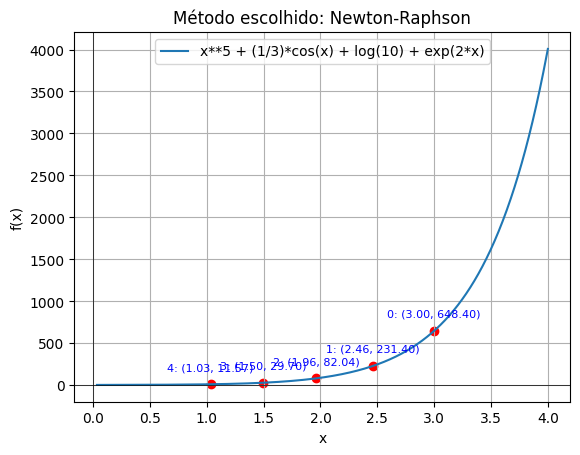

In [ ]:
def main():
    x = sy.symbols('x')
    f_expression = get_input("Digite a função em termos de x (ex: x**5 + (1/3)*cos(x) + log(10) + exp(2*x)): ", str)
    f = sy.lambdify(x, f_expression)

    error = get_input("Insira o erro mínimo: ", float)
    max_iterations = get_input("Insira o máximo de iterações: ", int)

    method = get_input("\nEscolha o método:\n1. Bisseção\n2. Newton-Raphson\n3. Secante\n", int)

    if method == 1:
        a = get_input("Digite o limite inferior a: ", float)
        b = get_input("Digite o limite superior b: ", float)
        x_vals, iterations = bissecao(f, a, b, error, max_iterations)

    elif method == 2:
        f_prime_expression = str(sy.diff(f_expression, x))
        f_prime = sy.lambdify(x, f_prime_expression)
        x0 = get_input("Digite o ponto inicial x0: ", float)
        x_vals, iterations = newton_raphson(f, f_prime, x0, error, max_iterations)

    elif method == 3:
        x0 = get_input("Digite o ponto x0: ", float)
        x1 = get_input("Digite o ponto x1: ", float)
        x_vals, iterations = secante(f, x0, x1, error, max_iterations)
    else:
        print("Método inválido.")
        return

    # Exibir os resultados das iterações
    print("\nResultados das iterações:")
    for i, x_val in enumerate(x_vals):
        print(f"Iteração {i}: x = {x_val}, f(x) = {f(x_val)}")

    # Gráficos
    interval = np.linspace(min(x_vals)-1, max(x_vals)+1, 1000)
    plt.plot(interval, [f(val) for val in interval], label=f_expression)
    plt.scatter(x_vals, [f(val) for val in x_vals], color='red')
    plt.title(f"Método escolhido: {['', 'Bisseção', 'Newton-Raphson', 'Secante'][method]}")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.grid(True)
    plt.axhline(0, color='black',linewidth=0.5)
    plt.axvline(0, color='black',linewidth=0.5)
    plt.legend()

    # Adicionando anotações para cada ponto
    for i, x_val in enumerate(x_vals):
        plt.annotate(f"{i}: ({x_val:.2f}, {f(x_val):.2f})",
                     (x_val, f(x_val)),
                     textcoords="offset points",
                     xytext=(0,10),
                     ha='center',
                     fontsize=8,
                     color='blue')

    plt.show()

if __name__ == "__main__":
    main()
